# Which Neighborhoods are the Safest in Pittsburgh?
## By Brinley Hammond

Dataset: https://data.wprdc.org/dataset/arrest-data

As safety is very important when choosing a neighborhood to live in, I've looked into neighborhoods with the most and least number of arrests.


The dataset is given by the City of Pittsburgh police and only contains arrests reported by them. 
The timeframe for the dataset begins in August 2016.

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

psafe = gpd.read_file('Pittsburgh Safety Data.csv')
psafe.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
0,1975272,16158872,42,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804,8,2,-79.94927741,40.45255125,None
1,1974456,16144120,31,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599,,,-80.08801806,40.44013633,None
2,1974466,16144165,63,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811,9,2,-79.89180294,40.48662475,None
3,1974550,16145257,25,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304,1,1,-80.00193876,40.45408043,None
4,1974596,16145962,25,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814,2,5,-80.05220414,40.44589982,None


In [54]:
psafe.iloc[:, [7, 9, 10]]

,OFFENSES,INCIDENTNEIGHBORHOOD,INCIDENTZONE
0,3929 Retail Theft.,Bloomfield,5
1,13(a)(16) Possession of Controlled Substance,Outside City,OSC
2,3929 Retail Theft.,Westwood,5
3,5503 Disorderly Conduct. / 5505 Public Drunken...,East Allegheny,1
4,2702 Aggravated Assault. / 2705 Recklessy Enda...,Crafton Heights,5
...,...,...,...
61197,3802(a)(1) DUI - General Impairment / 3802(b) ...,Central Business District,2
61198,"2701(a)(1) Simple Assault - Intent., Know., Re...",East Hills,5
61199,3309 Driving on Roadways Laned for Traffic. / ...,South Side Flats,3
61200,13(a)(32) Paraphernalia - Use or Possession / ...,Homewood West,5


In [27]:
neighborhood_names = set(df['INCIDENTNEIGHBORHOOD'])

for name in neighborhood_names:
    print(name)

nan
Summer Hill
Windgap
East Carnegie
Bluff
East Hills
Perry North
South Shore
Lincoln-Lemington-Belmar
Carrick
Strip District
South Side Flats
Chateau
Central Oakland
Homewood North
Elliott
Marshall-Shadeland
East Allegheny
Garfield
Lower Lawrenceville
Highland Park
Hazelwood
East Liberty
Homewood West
Friendship
Fairywood
Brookline
Bon Air
Squirrel Hill South
Morningside
Mount Oliver
Allegheny Center
Bedford Dwellings
Mt. Oliver Boro
Polish Hill
North Shore
Spring Garden
Esplen
Perry South
California-Kirkbride
Bloomfield
Homewood South
Overbrook
Northview Heights
Central Business District
New Homestead
Westwood
Manchester
Oakwood
Central Northside
Outside City
Duquesne Heights
West End
Allentown
Allegheny West
Point Breeze
Terrace Village
Swisshelm Park
West Oakland
Knoxville
Lincoln Place
Glen Hazel
Stanton Heights
Greenfield
Crafton Heights
Fineview
Outside County
Upper Lawrenceville
North Oakland
Troy Hill
Upper Hill
Regent Square
Outside State
Crawford-Roberts
Arlington Heights
S

In [69]:
incident_neighborhoods = df['INCIDENTNEIGHBORHOOD'].value_counts()
count_incident_neighborhoods = sum(incident_neighborhoods > 1)

print(f"Number of repeated unique names in the dataset: {count_incident_neighborhoods}")

Number of repeated unique names in the dataset: 98


In [70]:
count_incident_neighborhoods = df['INCIDENTNEIGHBORHOOD'].value_counts()
number_unique = pd.DataFrame({'Name': count_incident_neighborhoods.index, 'Count': count_incident_neighborhoods.values})

print(number_unique)

                         Name  Count
0   Central Business District   3778
1            South Side Flats   3185
2                     Carrick   2198
3              East Allegheny   2008
4              Homewood South   1939
..                        ...    ...
93                  Ridgemont     35
94          Central Northside     23
95            Mt. Oliver Boro     18
96     Troy Hill-Herrs Island      6
97    Mt. Oliver Neighborhood      2

[98 rows x 2 columns]


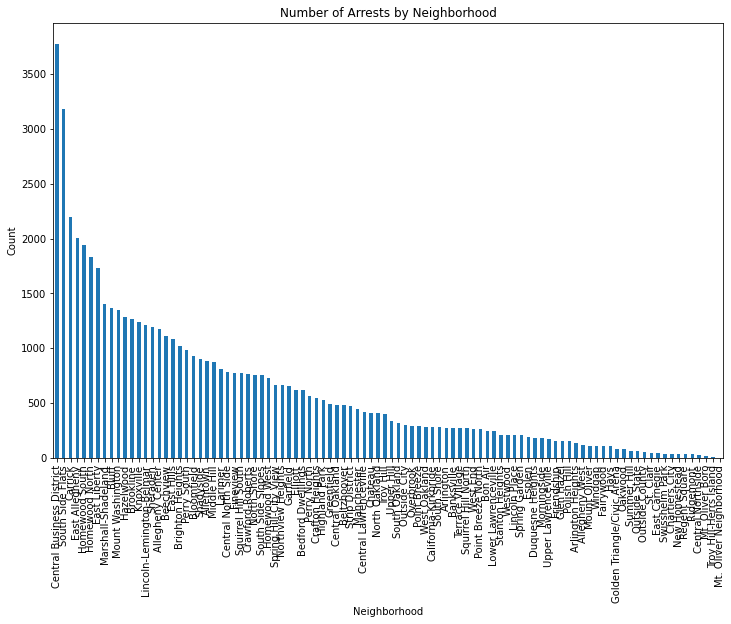

In [48]:
df = pd.read_csv('Pittsburgh Safety Data.csv', index_col=0)

location_counts = df['INCIDENTNEIGHBORHOOD'].value_counts()

location_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

As there are so many neighborhoods in Pittsburgh I decided to create a bar graph with the 20 neighborhoods that have the lowest arrest numbers

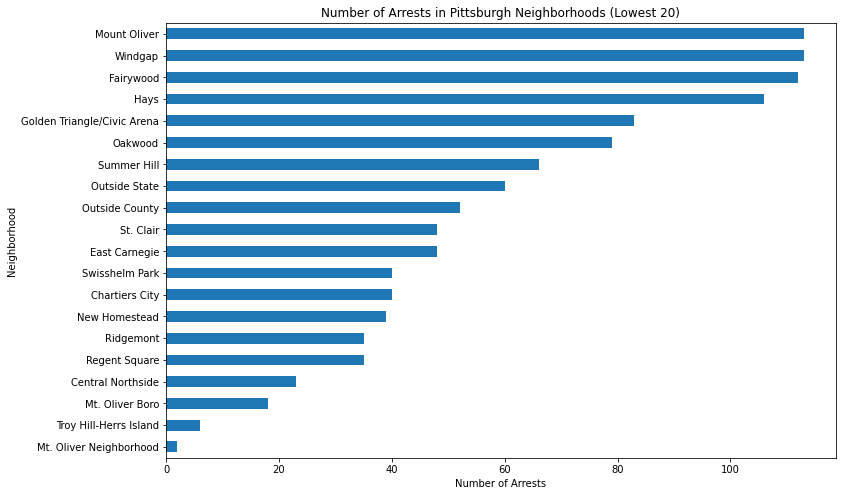

,Neighborhood,Number of Arrests
0,Mt. Oliver Neighborhood,2
1,Troy Hill-Herrs Island,6
2,Mt. Oliver Boro,18
3,Central Northside,23
4,Regent Square,35
5,Ridgemont,35
6,New Homestead,39
7,Chartiers City,40
8,Swisshelm Park,40
9,East Carnegie,48


In [71]:
neighborhood_counts = df['INCIDENTNEIGHBORHOOD'].value_counts()

low_20 = neighborhood_counts.sort_values().head(20)

low_20.plot(kind='barh', figsize=(12, 8))
plt.title('Number of Arrests in Pittsburgh Neighborhoods (Lowest 20)')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()

low_20_df = pd.DataFrame({'Neighborhood': low_20.index, 'Number of Arrests': low_20.values})

display(low_20_df)

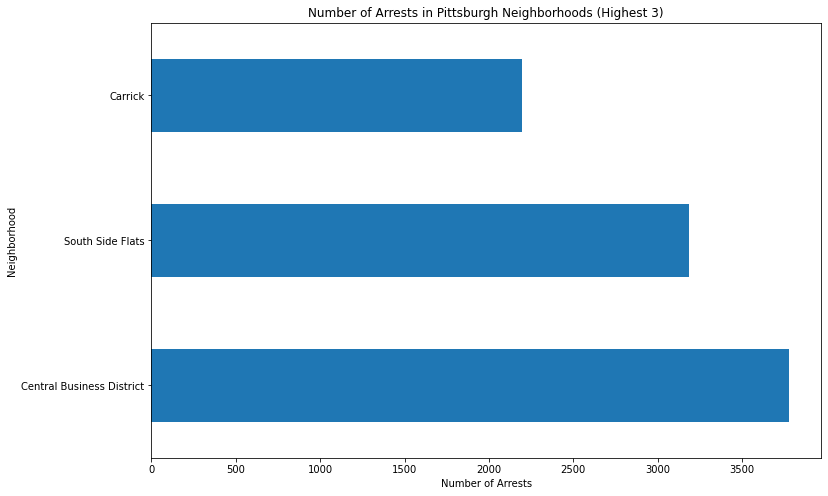

,Neighborhood,Number of Arrests
0,Central Business District,3778
1,South Side Flats,3185
2,Carrick,2198


In [67]:
highest_3 = location_counts.sort_values(ascending=False).head(3)

highest_3.plot(kind='barh', figsize=(12, 8))
plt.title('Number of Arrests in Pittsburgh Neighborhoods (Highest 3)')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()

highest_3_df = pd.DataFrame({'Neighborhood': highest_3.index, 'Number of Arrests': highest_3.values})

display(highest_3_df)

## Safety in Pittsburgh Conclusion

The top 5 safest neighborhoods in Pittsburgh is Regent Square with 35 arrests, Central Northside with 23 arrests, Mt Oliver Boro with 18 arrests, Troy Hill-Hers Island with 6 arrests, and the safest neighborhood is Mt. Oliver with only 2 arrests recorded.


The least safe neighborhood is the Central Business District with 3778 arrests.